# 📉 Gradient Descent: Jak maszyny się uczą?

Wyobraź sobie, że stoisz na szczycie wielkiej góry. Jest gęsta mgła. Nic nie widzisz.
Twoim celem jest zejście do najniższego punktu w dolinie (tam jest woda/dom/minimum błędu).

Jak to robisz?
1.  Badasz stopą grunt wokół siebie.
2.  Wyczuwasz, w którą stronę teren opada najmocniej.
3.  Robisz krok w tamtą stronę.
4.  Powtarzasz, aż teren przestanie opadać (jesteś na dnie).

To jest właśnie **Gradient Descent**.

*   **Góra:** To "Funkcja Kosztu" (Błąd modelu). Im wyżej jesteś, tym model jest głupszy.
*   **Dolina:** To "Minimum Globalne". Tam model działa najlepiej.
*   **Krok:** To "Learning Rate".

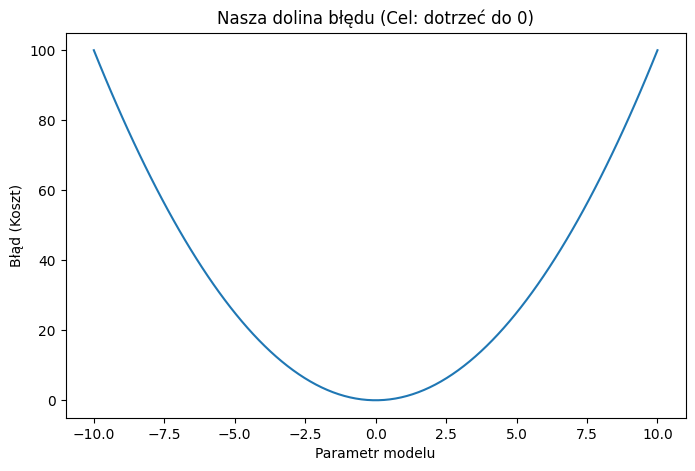

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. DEFINIUJEMY GÓRĘ (Funkcja matematyczna)
# Użyjemy prostej paraboli: y = x^2
# Naszym celem jest znalezienie x, dla którego y jest najmniejsze (oczywiście wiemy, że to 0, ale komputer nie wie).

def function(x):
    return x**2

def derivative(x):
    # Pochodna z x^2 to 2x. 
    # Pochodna mówi nam o NACHYLENIU zbocza.
    # Jeśli wynik jest dodatni -> zbocze rośnie (idź w lewo).
    # Jeśli wynik jest ujemny -> zbocze spada (idź w prawo).
    return 2*x

# Rysujemy naszą "dolinę"
x = np.linspace(-10, 10, 100)
y = function(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y)
plt.title("Nasza dolina błędu (Cel: dotrzeć do 0)")
plt.xlabel("Parametr modelu")
plt.ylabel("Błąd (Koszt)")
plt.show()

## Symulacja Schodzenia (Learning Rate)

Najważniejszym parametrem w AI jest **Learning Rate (Tempo Uczenia)**. Decyduje on o tym, jak wielki krok robimy.

Przetestujemy 3 scenariusze:
1.  **Mały Krok (Low LR):** Idziemy jak mrówka. Dojdziemy do celu, ale zajmie to wieki.
2.  **Dobry Krok (Good LR):** Idziemy pewnie i szybko.
3.  **Wielki Krok (High LR):** Skaczemy jak szaleni. Możemy przeskoczyć dolinę i wylądować po drugiej stronie (eksplozja błędu).

In [2]:
def gradient_descent(start_x, learning_rate, n_steps):
    path_x = [start_x]
    current_x = start_x
    
    for _ in range(n_steps):
        grad = derivative(current_x) # Sprawdzamy nachylenie
        
        # AKTUALIZACJA (Serce algorytmu):
        # Nowa pozycja = Stara pozycja - (Krok * Nachylenie)
        current_x = current_x - (learning_rate * grad)
        
        path_x.append(current_x)
        
    return path_x

# Ustawienia symulacji
start_pos = 9.0  # Zaczynamy wysoko po prawej stronie
steps = 10

# Scenariusz 1: Za wolno
path_slow = gradient_descent(start_pos, learning_rate=0.05, n_steps=steps)

# Scenariusz 2: Idealnie
path_good = gradient_descent(start_pos, learning_rate=0.2, n_steps=steps)

# Scenariusz 3: Za szybko (Overshooting)
path_fast = gradient_descent(start_pos, learning_rate=0.95, n_steps=steps)

print("Symulacja zakończona.")

Symulacja zakończona.


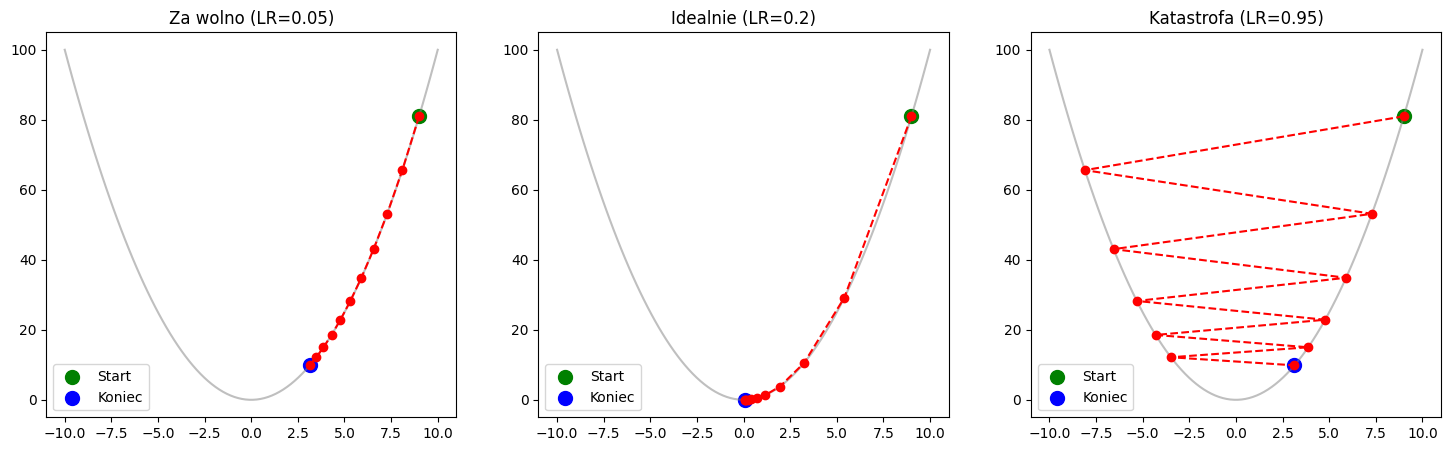

In [3]:
# WIZUALIZACJA WYNIKÓW
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
titles = ["Za wolno (LR=0.05)", "Idealnie (LR=0.2)", "Katastrofa (LR=0.95)"]
paths = [path_slow, path_good, path_fast]

for i in range(3):
    # Rysujemy dolinę
    ax[i].plot(x, y, color='gray', alpha=0.5)
    
    # Rysujemy kroki algorytmu
    path = np.array(paths[i])
    ax[i].plot(path, function(path), marker='o', color='red', linestyle='--')
    ax[i].scatter(path[0], function(path[0]), color='green', s=100, label='Start') # Start
    ax[i].scatter(path[-1], function(path[-1]), color='blue', s=100, label='Koniec') # Koniec
    
    ax[i].set_title(titles[i])
    ax[i].legend()

plt.show()

## 🧠 Podsumowanie: Dlaczego to jest kluczowe?

Spójrz na trzeci wykres ("Katastrofa").
Czerwone kropki skaczą od lewej do prawej ściany, zamiast schodzić w dół. Czasem nawet wspinają się wyżej!
To się nazywa **Divergence (Rozbieżność)**.

**Tu jest haczyk.**
W prawdziwym świecie, gdy trenujesz Sieć Neuronową (np. rozpoznawanie obrazów), trening trwa godziny lub dni.
*   Jeśli ustawisz **Learning Rate za nisko**: Model będzie się uczył miesiącami.
*   Jeśli ustawisz **Learning Rate za wysoko**: Model nigdy się nie nauczy, bo będzie "przeskakiwał" rozwiązanie.

To dlatego inżynierowie AI spędzają tyle czasu na dostrajaniu tego jednego parametru. To jak strojenie radia – musisz trafić idealnie w częstotliwość.